In [11]:
### Library Imports
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
# Function Imports
import sys
sys.path.append('/Users/mburley/TradingIndicators/Functions')  # Add the 'Functions' directory to the Python path
from IndicatorFunctions import import_stock_data, get_ADX, adx_mult_tickers, plot_function
from FilterFunctions import filter_indicators

In [12]:
# Function Call for Multiple Tickers
mult_tick_list = ['AAPL', 'GOOG']
start_date = '2024-01-01'
stock_data2 = import_stock_data(mult_tick_list, start_date)
#print(stock_data2.tail())
adx_df = adx_mult_tickers(stock_data2, mult_tick_list)
print(adx_df.tail())

[*********************100%%**********************]  2 of 2 completed

         AAPL                             GOOG                      
          ADX        DI+        DI-        ADX        DI+        DI-
81  20.162298  41.470907  15.391248  30.615335  45.748933  25.665994
82  19.727665  33.805202  24.029636  28.810099  40.083842  28.391029
83  18.389033  29.297194  24.121986  27.245561  36.080619  25.555582
84  17.876162  27.490829  20.510268  25.889628  33.352454  23.623246
85  23.614350  53.244672  12.933714  24.878876  32.568217  22.487985


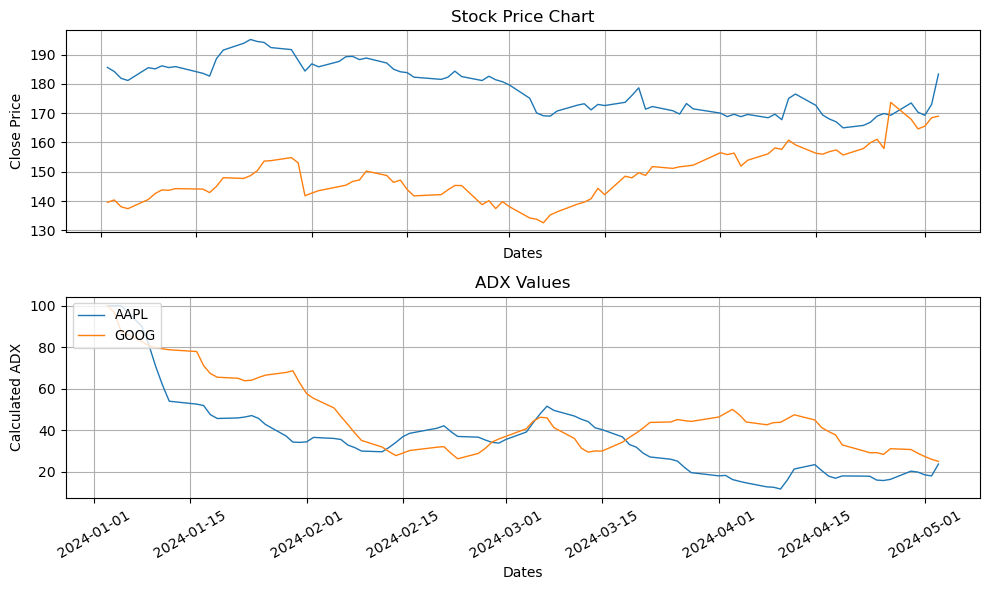

In [13]:
### Plot ADX
# Use .xs() - allows for selection of a specific column level in a MultiIndex DataFrame
plot = plot_function(stock_data2, adx_df.xs('ADX', axis = 1, level = 1), tickers = mult_tick_list, indicator_type = 'ADX')
plot


In [14]:
### Apply Filtering Fuction
# Buy Signal Conditions:
#   - ADX is rising (indicating increasing trend strength) and crosses above a threshold (e.g., 20 or 30).
#   - +DI (DI+) crosses above -DI (DI-), indicating a potential uptrend.
# Sell Signal Conditions:
#   - ADX is falling (indicating weakening trend strength) and crosses below a threshold (e.g., 20 or 30).
#   - -DI (DI-) crosses above +DI (DI+), indicating a potential downtrend.
adx_sell = 25  
adx_buy = 30  
tickers = mult_tick_list

# Create empty Signal cols for each ticker
for t in tickers:
      adx_df[f'{t}_Signal'] = ''
#adx_df.tail(10)

# Filter based on indicator values
for i, row in adx_df.iterrows():
    for t in tickers:
        if row[t, 'ADX'] > adx_buy and row[t, 'DI+'] > row[t, 'DI-']:
            adx_df.loc[i, f'{t}_Signal'] = 'BUY'
        elif row[t, 'ADX'] < adx_sell and row[t, 'DI-'] > row[t, 'DI+']:
            adx_df.loc[i, f'{t}_Signal'] = 'SELL'

adx_df.tail(10)

AAPL                             GOOG                        \
          ADX        DI+        DI-        ADX        DI+        DI-   
76  17.785134  23.521254  33.321532  30.053860  25.432988  19.978980   
77  17.712586  21.335220  30.224674  29.050893  28.202409  17.830463   
78  15.867885  28.265772  26.155675  29.094596  29.009064  15.834594   
79  15.652620  31.015640  23.277079  28.269734  20.447197  32.599113   
80  16.208081  31.294559  20.942013  30.999004  53.900087  18.575852   
81  20.162298  41.470907  15.391248  30.615335  45.748933  25.665994   
82  19.727665  33.805202  24.029636  28.810099  40.083842  28.391029   
83  18.389033  29.297194  24.121986  27.245561  36.080619  25.555582   
84  17.876162  27.490829  20.510268  25.889628  33.352454  23.623246   
85  23.614350  53.244672  12.933714  24.878876  32.568217  22.487985   

   AAPL_Signal GOOG_Signal  
                            
76        SELL         BUY  
77        SELL              
78                          
79                          
80                     BUY  
81                     BUY  
82                          
83                          
84                          
85

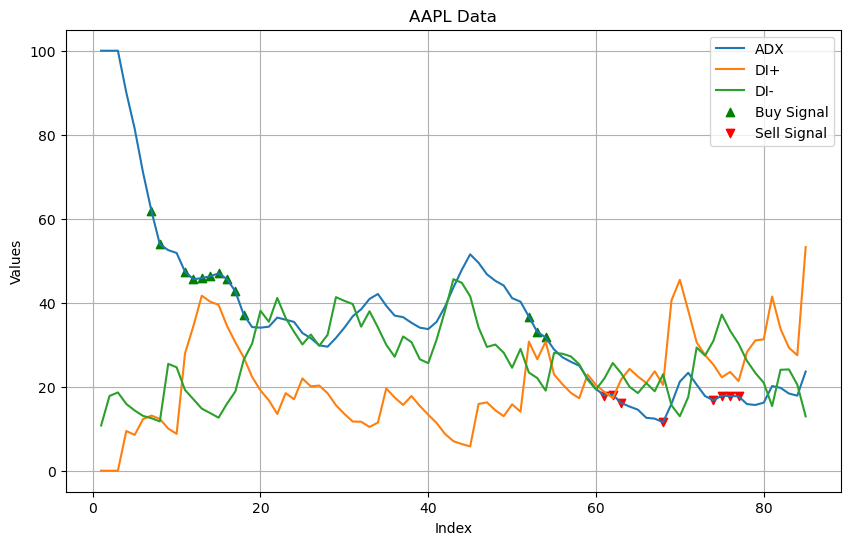

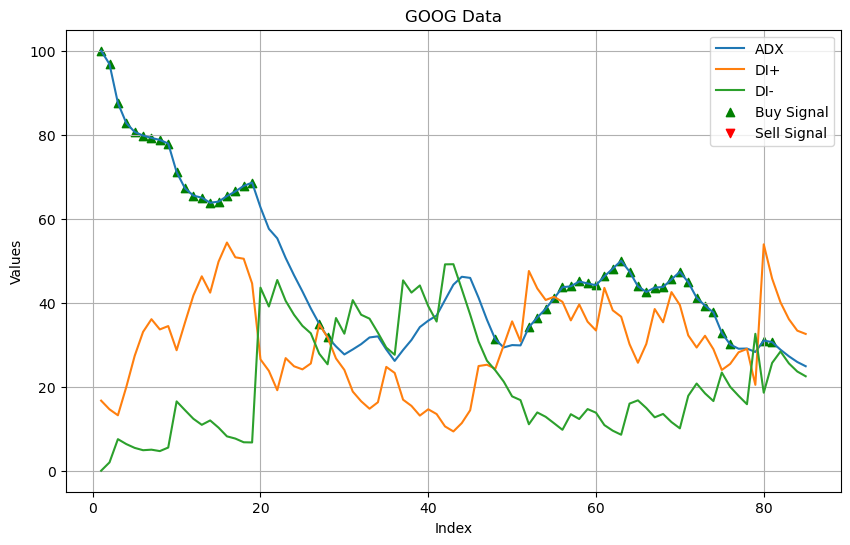

In [16]:
### Plot ADX with Indicators
# Iterate through tickers to plot each ticker's data
for t in tickers:
    plt.figure(figsize = (10, 6))
    plt.plot(adx_df.index, adx_df[t, 'ADX'], label = 'ADX')
    plt.plot(adx_df.index, adx_df[t, 'DI+'], label = 'DI+')
    plt.plot(adx_df.index, adx_df[t, 'DI-'], label = 'DI-')

    # Plot Buy Signals
    buy_indices = adx_df.index[adx_df[f"{t}_Signal"] == 'BUY']
    plt.scatter(buy_indices, adx_df[adx_df[f"{t}_Signal"] == 'BUY'][t, 'ADX'], color = 'green', marker = '^', label = 'Buy Signal')

    # Plot Sell Signals
    sell_indices = adx_df.index[adx_df[f"{t}_Signal"] == 'SELL']
    plt.scatter(sell_indices, adx_df[adx_df[f"{t}_Signal"] == 'SELL'][t, 'ADX'], color = 'red', marker = 'v', label = 'Sell Signal')

    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'{t} Data')
    plt.legend()
    plt.grid(True)
    plt.show()